<a href="https://colab.research.google.com/github/kyata/introduction_to_ml_with_python/blob/master/intro_to_ml_chapter1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Pythonではじめる機械学習
===

# 1. はじめに

---
## 1.1.1. 機械学習で解決可能な問題

### 教師あり学習

  - 既知の例を一般化することで意思決定過程を自動化する 

  - ユーザが入力データと望ましい出力のペア群をアルゴリズムに与える

  - アルゴリズムは入力から望ましい出力を生成する方法を発見する。

  -  入力と出力のペア群から学習
  
  - 適用例

    - 手書き文字識別

    - 医用画像からの腫瘍の判定

    - クレジットカードの不正トランザクション検出
    
---
### 教師なし学習

  - 適用例
    - 多数のブログエントリからのトピック特定

    - 顧客を嗜好でグループに分類

    - Webサイトへの異常アクセスパターンの検出

---

- **入力データを計算機が理解できる形にすることが重要**

- 個々のエンティティ/行を**サンプル**と呼ぶ

- エンティティの持つ特性を表現する列を**特徴量**と呼ぶ.

- どんな機械学習アルゴリズムでもデータに情報がなければ予測することはできない.

- モデルを構築する前にデータセットがどうなっているかを理解する必要がある.

- アルゴリズムにはそれぞれ得意とするデータの種類や問題の設定がある.

- 機会学習システムを構築する際には以下のような質問に答えられるようにするべき.

  1. 答えようとしている問はなにか?
  1. 集めたデータでその問いに答えられるか?

  1. 問を機械学習問題に置き換える最も良い方法はなにか?

  1. 解こうとしている問題を表現するのに十分なデータは集めたか?

  1. どのような特徴量を抽出したか。その特徴量で正しい予測が可能か?

  1. アプリケーションがうまく行ったかどうかをどう判断すべきか?

  1. 製品の他の部分と機械学習はどのように関係するか?

## 1.4 必要なライブラリとツール

- Jupyter Notbook
  - ブラウザ上でコードを実行するための環境
  - コードやテキストや画像を取り込むことが簡単にできる
  - コードは[Github](https://github.com/amueller/introduction_to_ml_with_python)からDL可能
  
- NumPy
  - Puthonで科学技術計算をする際のライブラリ
  - 多次元配列や線形代数、フーリエ変換、擬似乱数生成などの高レベル数学関数が用意されている.
  - scikit-learnではNumPyの配列(ndarray)が基本的なデータ構造となる
  - 配列のすべての型の要素は同じ型でなければならない
 

In [0]:
#@title NumPy配列の使い方

import numpy as np

x = np.array([[1, 2, 3], [4, 5, 6]])
print("x:\n{}".format(x))

## 1.4.3. SciPy

- SciPyはPythonで科学技術計算を行うための関数を集めたもの

- 以下のような機能を持つ
  - 高度な線形代数ルーチン
  - 数学関数の最適化
  - 信号処理
  - 特殊な数学関数
  - 統計分布
  
- scikit-learnはアルゴリズム実装時にSciPy関数群を利用している

- もっとも重要なSciPyの要素は**scipy.sparse**

- **scipy.sparse**は疎行列を表現するデータ構造

- scikit-learnで用いいるもう一つのデータ表現(⇔ndarray)

In [0]:
#@title SciPyサンプル
from scipy import sparse

# 対角成分が1でそれ以外が0のに2次元配列を作る
eye = np.eye(4)

print("Numpy array:\n{}".format(eye))

In [0]:
eye = np.eye(4)

# Numpy配列をScipyのCSR形式の疎行列に変換する
# 非ゼロ要素だけが格納される
sparse_matrix = sparse.csr_matrix(eye)
print("\nScipy sparse CSR matrix:\n{}".format(sparse_matrix))



Scipy sparse CSR matrix:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


- 多くの場合、疎なデータを密なデータ構造で作ることはできない(メモリに乗らないので)ため、疎なデータ表現を直接つくる必要がある.


In [0]:
data = np.ones(4)
row_indices = np.arange(4)
col_indices = np.arange(4)
eye_coo = sparse.coo_matrix((data, (row_indices, col_indices)))

print("COO representation:\n{}".format(eye_coo))

COO representation:
  (0, 0)	1.0
  (1, 1)	1.0
  (2, 2)	1.0
  (3, 3)	1.0


### 1.4.4. matplotlib

- 科学技術計算向けのグラフ描画ライブラリ
- 出版にも使える品質のデー可視化を実現する関数群を提供

  - 折れ線グラフ
  - ヒストグラム
  - 散布図
  
- データや解析結果をさまざまな視点から可視化することで重要な洞察が得られる

- Jupyter Notebookで*%matplotlib notebook*や*%matplotlib inline*コマンドを用いると図をブラウザに直接表示できる



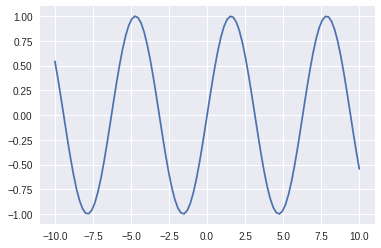

In [0]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# -10から10までを100ステップに区切った列を配列として生成
x = np.linspace(-10, 10, 100)

# サイン関数を用いて2つめの配列を生成
y = np.sin(x)

# plot関数は一方の配列に対して他方の配列をプロットする
plt.plot(x, y, marker="x")



### 1.4.5 pandas

- データを変換したり解析するためのライブラリ

- このライブラリはRのDataFrameを模して作られた**DataFrame**データ構造を中心に構成されている

  - DataFrameはテーブル(表)のようなもの

- テーブルに対してSQLのような問い合わせを行ったりjoinしたりできる

- DataFrameでは列ごとに異なる方でもOK
  - e.g. 整数, 日付, 浮動小数点数, 文字列 etc...
  
- さらにpandasは様々なフォーマットやデータベースからデータを取り込むことができる

  - e.g. RDBMS(SQL), Excel, CSV etc...

In [0]:
# pandasを用いてディクショナリ(Pythonの辞書型)からDataFrame作る例

import pandas as pd
# from IPython import display
from IPython.display import display


# 人を表す簡単なデータセットを作る
data = { 'Name' : ["John", "Anna", "Peter", "Linda"],
               'Location' : [ "New York", "Paris", "Berlin", "London" ],
               'Age' : [24, 13, 53, 33]
            }

data_pandas = pd.DataFrame(data)

# IPython.display()を用いるとJupyter notbookで表示可能

display(data_pandas)



,Age,Location,Name
0,24,New York,John
1,13,Paris,Anna
2,53,Berlin,Peter
3,33,London,Linda


### 1.4.6 mglearn

- 本書(Pythonではじめる機械学習)で使われているライブラリ

- グラフ描画やデータロードなどの詳細なコードをラップしている

- 一般的な環境で呼び出すには```pip install mglearn```でインストールしておくこと



In [0]:
# mglearnをGoogle Colaboratoryで使う

!pip install mglearn


### 1.5 Python 2 vs. Python 3

- Pythonには2系と3系の非互換なバージョンがある
- Python 2はすでに開発が終了されている

- これから新たにプロジェクトを開始するのであればPython 3を使ったほうが無難

  => ただし、双方で利用可能なようにコードを書くことも容易にできる

### 書籍で用いられている各種ライブラリのバージョン

```
  Python version: 3.5.2 |Anaconda 4.1.1 (64-bit)| (default, Jul  2 2016, 17:53:06)
  [GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]
  pandas version: 0.18.1
  matplotlib version: 1.5.1
  NumPy version: 1.11.1
  SciPy version: 0.17.1
  IPython version: 5.1.0
  scikit-learn version: 0.18
  ```

### 1.7 最初のアプリケーション


- 簡単な機械学習アプリケーションを通じて最初のモデルを構築する

#### アプリ概要

---

- アマチュア園芸家が見つけたアイリスの花の種類を分別する

- アイリスについては以下の4つの特徴量を用いる
  - 花弁の長さ(sepal length)
  - 花弁の幅(sepal width)
  - ガクの長さ(petal length)
  - ガクの幅(petal width)

- アイリスの分類は以下の3つ
  - setosa
  - versicolor
  - virginica

- 発見するアイリスはこの上記の三種のうちの1つだと仮定

- 新たに見つけたアイリスの種類を予測するため
種類がわかっているアイリスの測定値を用いて機械学習を構築する

---

#### 解説

- 種類がわかっているアイリスの測定結果があるので、これは**教師あり学習**となる

- この問題はクラス分類(classification)問題の一例

- １つのデータポイント(1つのアイリス)に対して望まれる出力は花の種類である

- 特定のデータポイントの属する種類をラベル(label)と呼ぶ


----

### 1.7.1 データを読む

- irisデータ・セットを用いる

- scikit-learnのdatasetsモジュールに含まれている

- load_iris関数で読み込むことができる

In [0]:
from sklearn.datasets import load_iris
iris_dataset = load_iris()

print("Keys of iris_dataset: \n{}".format(iris_dataset.keys()))

Keys of iris_dataset: 
dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre 
...


In [0]:

print(iris_dataset['DESCR'][:193] + " \n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre 
...


In [0]:
print("Target names: {}".format(iris_dataset['target_names']))

Target names: ['setosa' 'versicolor' 'virginica']


データ本体はtargetとdataフィールドに格納されている

In [0]:
print("Feature names: \n{}".format(iris_dataset['feature_names']))

Feature names: 
['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


dataにはガクの長さ, ガクの幅, 花弁の長さ, 花弁の幅がNumPy配列として格納されている

In [0]:
print("Type of data: {}".format(type(iris_dataset['data'])))

Type of data: <class 'numpy.ndarray'>


配列dataの行は個々の花に対応し、列は個々の花に対して行われた4つの測定に対応する

In [0]:
print("Shape of data: {}".format(iris_dataset['data'].shape))

Shape of data: (150, 4)


配列には１５０の花の測定結果が格納れている

- 機会学習では個々のアイテムを**サンプル**と呼び、その特性を**特徴量**と呼ぶ

- data配列のshapeはサンプルの個数 * 特徴量の数
- これはscikit-learnで慣例として用いられている表現で
常にこの形になっている

以下に５つのサンプルを示す

このデータから次のことがわかる

1. 最初の5つの花は花弁の幅が全て0.2cm
1. 5つの中では最初の花が最も長い5.1cmのガクを持っている





In [0]:
print("First five columns of data: \n {}".format(iris_dataset['data'][:5]))

First five columns of data: 
 [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]]


In [0]:
# 配列targetには測定された個々の花の種類がNumPy配列として格納されている

print("Type of target: {}".format(type(iris_dataset['target'])))

Type of target: <class 'numpy.ndarray'>


In [0]:
# targetは一次元の配列で個々の花に1つのエントリが対応する

print("Shape of target: {}".format(iris_dataset['target'].shape))

Shape of target: (150,)


In [0]:
# 種類は0から2までの整数としてエンコードされている
# => 0: setosa, 1: versicolor, 2: virginica

print("Target: \n{}".format(iris_dataset['target']))

Target: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


### 1.7.2 成功度合いの測定：訓練データとテストデータ


- 構築したモデルを新たに計測したデータに適用する前にそのモデルが実際に機能するのか知っておく必要がある
  => 予測を信じてよいのか確認しておく
  
- モデルを構築するのに使ったデータをモデルの評価に使うことはできない。

- これはモデルが単純に訓練データをまるまる覚えてしまい、訓練データに含まれているどのデータポイントに対しても常に正確にラベルを予測できるようになってしまうから

- 「覚えている」だけでは、モデルがうまく**汎化**(generalize)できていることの指標にはならない(新たなデータに対してもうまく機能することの指標にはならない)

- モデルの性能を評価するにはラベルを持つあらたらしいデータを使う必要がある

- これを実現するには集めたラベル付きデータを2つに分けるのが一般的

- 一方のデータを機会学習モデルの構築に用いる

- この一方のデータのことを**訓練データ(training data)**または**訓練セット(training set)**と呼ぶ.

- もう一方のデータを使ってモデルがどの程度うまく機能するかを評価する

- こちらは**テストデータ(test data), テストセット(test set)**もしくは**ホールドアウトセット(hold-out set)**と呼ぶ



#### train_test_split()の解説

- scikit-learnにはデータ・セットを並べ替えて分割する**train_test_split**という関数が用意されている

- この関数はデータトラベルの75%を取り出して訓練セットにし、残りの25%をテストセットとして使用する

- 訓練セットとテストセットに割り当てるデータの量には厳密には決まりがない
  - 目安としては25%くらいに割り当てるのが一般的

- scikit-learnではデータを大文字のXでラベルをyで示すのが一般的
- これは数学での標準的な数式の書き方$f(x)=y$から来ている
- さらに数学での慣例に従い、2次元配列(行列)データには大文字Xを一次元配列(ベクトル)であるラベルには小文字のyを用いる



In [0]:
# train_test_split関数を呼び出した結果をこの命名規則に従った変数に代入する

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    iris_dataset['data'], iris_dataset['target'], random_state=0
)


- train_test_split関数は分割を行う前に疑似乱数データ用いてデータをシャッフルする

- データポイントはラベルでソートされているので、
単純に最後の25%をテストセットにするとすべてのデータポイントが'2'になってしまう

- 3クラスのうち1つしか含まれていないようなデータ・セットでは
モデルの汎化がうまくていっているか判断できない。

- だから先にデータをシャッフルしてテストデータにすべてのクラスが含まれるようにしておく

- 同じ関数を何度か呼び出した際に確実に同じ結果が得られるよう, **random_state**パラメータを固定して用いる

- 関数train_test_splitの出力はX_train、X_test、y_train、y_testとなる。これらはすべ て NumPy 配列で、X_train にはデータセットの 75% の行が、X_test には残りの 25% の行が含まれ る。



In [0]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test  shape: {}".format(X_test.shape))
print("y_test  shape: {}".format(y_test.shape))

X_train shape: (112, 4)
y_train shape: (112,)
X_test  shape: (38, 4)
y_test  shape: (38,)


### 1.7.3 最初にすべきこと：データをよく観察する

- 機械学習モデルを構築する前に、データを検査したほうがよい
  - 機械学習を用いなくても簡単にとけるかもしれない
  - データに必要な情報が含まれていないかもしれない
  
- データを検査するいことでデータ内の異常値やおかしな点を見つけることができる

- 例えばアイリスの花がセンチメートルでなくてインチで計測されちるかも・・・

- 実際の世界ではデータが不整合だったり、測定がおかしかったりすることは珍しくない

- データを検査する最良の方法は**可視化(visualization)**である

- 3つを持つ特徴量を持つデータセットをプロットすることは難しい
- **ペアプロット**を用いることで、すべての組み合わせ可能な特徴量の組み合わせをプロットできる

- 特徴量の数が少ない場合(今回は４つ)にはこの方法がうまくいく

- ただし、ペアプロットではすべての特徴量の相関を同時に見ることはできない

- Fig1-3に訓練セットの特徴量のペアプロットを示す



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: FutureWarning: pandas.scatter_matrix is deprecated. Use pandas.plotting.scatter_matrix instead
  # Remove the CWD from sys.path while we load stuff.


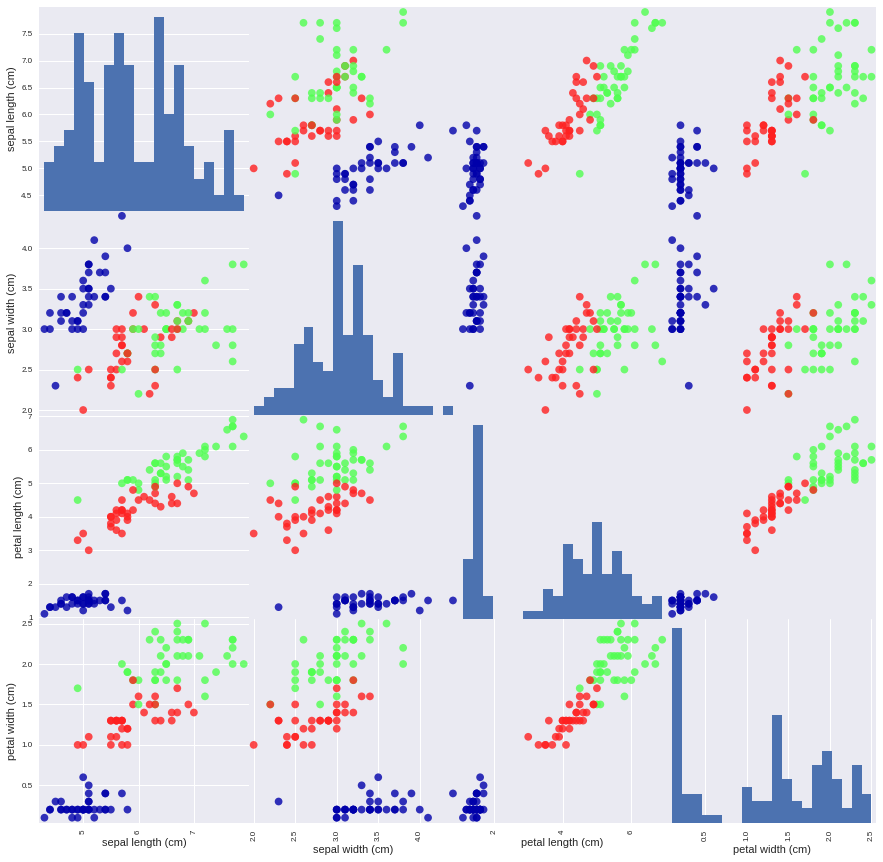

In [0]:
#@title
# X_trainのデータからDataFrameを作る

import mglearn

# iris_dataset.feature_namesの文字列を使ってカラムに名前をつける
iris_dataframe = pd.DataFrame(X_train, columns=iris_dataset.feature_names)

# データフレームからscatter matrixを作成し、y_trainに従って色をつける
grr = pd.scatter_matrix(
    iris_dataframe, c=y_train, figsize=(15, 15), marker='0', 
    hist_kwds={'bins': 20}, s=60, alpha=.8, cmap=mglearn.cm3
)
